## Cardiovascular Disease dataset

## Behandling av data inför analys

In [49]:
import kagglehub
import pandas as pd

# Ladda ner senaste versionen av datasetet
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")



# Läs in datasetet
df = pd.read_csv(f'{path}/cardio_train.csv', sep=';')

# Visa de första raderna för att kontrollera att det lästs in korrekt
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [50]:
# Identifiera och ta bort felaktiga blodtryck
df = df[(df["ap_hi"] > 0) & (df["ap_lo"] > 0)]  # Ta bort negativa blodtryck
df = df[(df["ap_hi"] < 300) & (df["ap_lo"] < 300)]  # Ta bort omöjligt höga blodtryck

# Kontrollera antalet kvarvarande poster
print(f"Antal kvarvarande poster efter rensning: {len(df)}")

Antal kvarvarande poster efter rensning: 68985


# Exploratory Data Analysis (EDA) av Hjärt-kärlsjukdom Dataset

I detta avsnitt kommer jag att utforska och analysera datasetet för hjärt-kärlsjukdom från Kaggle. Jag kommer att besvara flera frågor om patienternas hälsotillstånd och riskfaktorer, samt visualisera resultaten med hjälp av diagram. 

## Datasetbeskrivning
Datasetet består av 70 000 patientposter med 11 egenskaper plus en målvariabel (`cardio`). Egenskaperna inkluderar ålder, kön, blodtryck, kolesterol, rökning, fysisk aktivitet med merar. Jag har noterat att datasetet innehåller vissa felaktigheter, t.ex. negativa blodtryck och omöjligt höga blodtryck vilket har rensats bort.

## Analys och Visualisering
Vi kommer att använda `pandas`, `matplotlib` och `seaborn` bland annat för att utföra analysen och skapa visualiseringar av resultaten. 

Följande frågor kommer att besvaras:

1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?
3. Hur ser åldersfördelningen ut?
4. Hur stor andel röker?
5. Hur ser viktfördelningen ut?
6. Hur ser längdfördelningen ut?
7. Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

Låt oss börja med att läsa in datasetet och utföra en första analys.

## 1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

Som en inledande fråga kommer jag att räkna antalet patienter som är positiva (`cardio = 1`) och negativa (`cardio = 0`) för hjärt-kärlsjukdom. Detta ger oss en översikt över fördelningen av sjukdomen i datasetet.

I detta fallet har jag inte tagit några andra parametrar i beaktan än just om man anses vara positiv eller negativ för hjärt-kärlsjukdomar. Utan den skall enbart ses som en första överblick för hur sjukdomen är fördelas i datasetet.

In [51]:
# 1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
positiva = df[df["cardio"] == 1].shape[0]
negativa = df[df["cardio"] == 0].shape[0]

print(f"Antal positiva för hjärt-kärlsjukdom: {positiva}")
print(f"Antal negativa för hjärt-kärlsjukdom: {negativa}")

Antal positiva för hjärt-kärlsjukdom: 34141
Antal negativa för hjärt-kärlsjukdom: 34844


## 2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

För att sedan undersöka andra variabler kommer jag att kategorisera kolesterolvärdena i tre grupper: normala, över normala och långt över normala utifrån datasetets nivåer. Jag kommer sedan att beräkna andelen för varje kategori och visualisera resultatet med ett cirkeldiagram.

Även här har det inte beaktats några andra perametrar än de nivå-kategorier som angavs i datasetet.



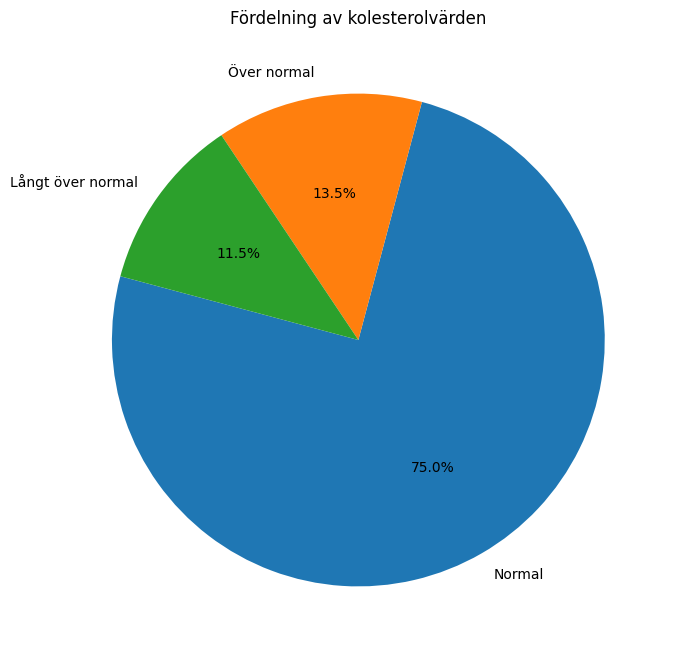

In [95]:
# 2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

import matplotlib.pyplot as plt

# Kategorisera kolesterolvärden
def kategorisera_kolesterol(kolesterol):
    if kolesterol == 1:
        return "Normal"
    elif kolesterol == 2:
        return "Över normal"
    elif kolesterol == 3:
        return "Långt över normal"
    else:
        return "Okänd"

# Applicera kategorisering på datasetet
df["kolesterol_kategori"] = df["cholesterol"].apply(kategorisera_kolesterol)

# Beräkna andelen för varje kategori
andelar = df["kolesterol_kategori"].value_counts(normalize=True) * 100

# Rita cirkeldiagram
plt.figure(figsize=(8, 8))
plt.pie(andelar, labels=andelar.index, autopct="%1.1f%%", startangle=165)
plt.title("Fördelning av kolesterolvärden")
plt.show()

## 3. Hur ser åldersfördelningen ut?

Vidare kommer jag att analysera åldersfördelningen i datasetet. Eftersom åldern i datasetet är angiven i dagar, kommer jag att konvertera den till år för att göra analysen mer lättförståelig.

Histogrammet visar hur patienternas ålder är fördelad i datasetet. Detta kan ge oss insikter om vilka åldersgrupper som är mer representerade och hur åldern kan relatera till risken för hjärt-kärlsjukdom.


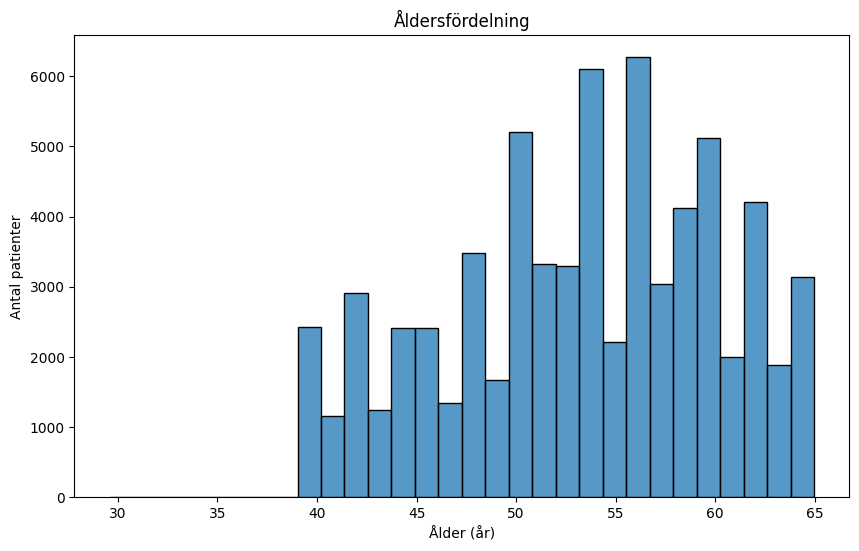

In [96]:
# 3. Hur ser åldersfördelningen ut? 

import seaborn as sns

# Rita histogram för åldersfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["age"] / 365, bins=30)  # Konvertera ålder från dagar till år
plt.title("Åldersfördelning")
plt.xlabel("Ålder (år)")
plt.ylabel("Antal patienter")
plt.show()

## 4. Hur stor andel röker?

I datasetet finns det data för andelen rökare, jag kommer därför att beräkna andelen patienter som röker i datasetet. Rökningsstatus är angiven i kolumnen `smoke`, där `1` indikerar rökare och `0` indikerar icke-rökare. Jag kommer att beräkna medelvärdet av denna kolumn för att få andelen rökare för att få en insikt i hur stor andel det rör sig om.

Denna analys ger oss en förståelse för hur stor andel av patienterna i datasetet som röker. Rökning är en viktig riskfaktor för hjärt-kärlsjukdom, och denna information kan vara användbar för vidare analyser.

In [97]:
# 4. Hur stor andel röker? 

# Beräkna andelen som röker
andel_roker = df["smoke"].mean() * 100 # Beräknar medelvärdet av kolumnen smoke, där 1 indikerar rökare och 0 icke-rökare.

print(f"Andel som röker: {andel_roker:.2f}%")

Andel som röker: 8.79%


## 5. Hur ser viktfördelningen ut?

Vidare kommer jag att analysera viktfördelningen i datasetet. Vikt är en viktig faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få insikter om hur patienternas vikt är fördelad. Jag kommer att använda ett histogram för att visualisera fördelningen för att snabbt se hur viktfördelningen ser ut.


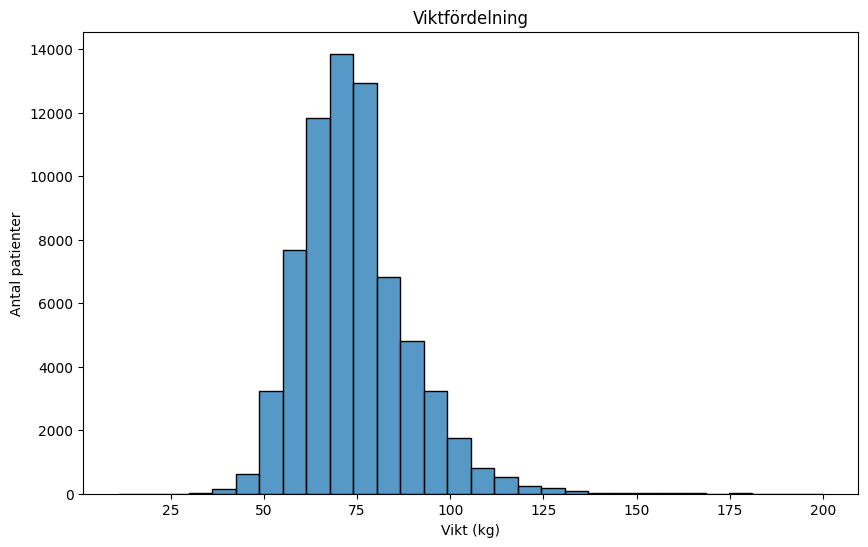

In [98]:
# 5. Hur ser viktfördelningen ut? 

# Rita histogram för viktfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["weight"], bins=30)
plt.title("Viktfördelning")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal patienter")
plt.show()

## 6. Hur ser längdfördelningen ut?

En annan viktig faktor är längden, därför kommer jag att analysera längdfördelningen i datasetet. Längd är en faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få en överblick om hur patienternas längd är fördelad. Jag kommer att använda ett histogram för att visualisera fördelningen.

Histogrammet visar hur patienternas längd är fördelad i datasetet. Detta kan ge oss en fingervisning om vilka längdintervall som är vanligast och hur längden kan relatera till risken för hjärt-kärlsjukdom.


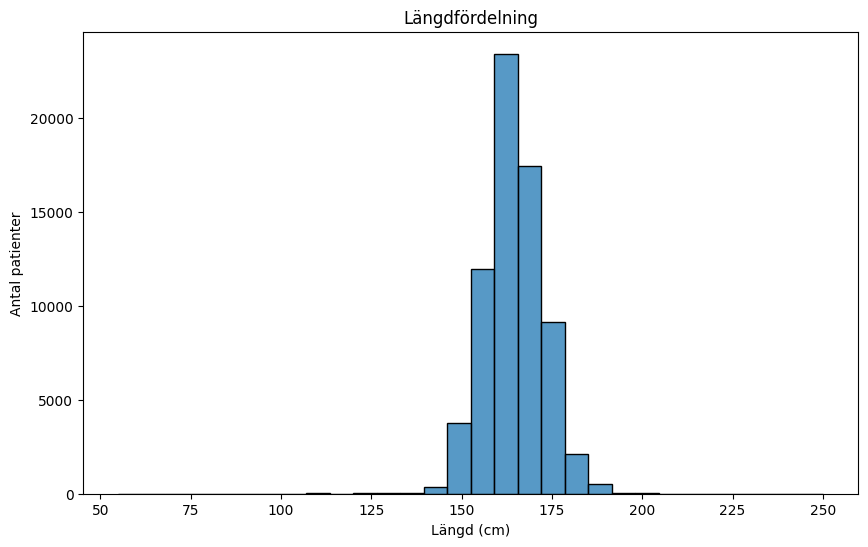

In [104]:
# 6. Hur ser längdfördelningen ut? 

# Rita histogram för längdfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["height"], bins=30)
plt.title("Längdfördelning")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal patienter")
plt.show()

## 7. Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

Det kan samtidigt vara intressant hur fördelningen ser ut mellan kön, därmed kommer jag att analysera andelen kvinnor och män som har hjärt-kärlsjukdom i datasetet. 

Kön är en viktig faktor som kan påverka risken för hjärt-kärlsjukdom, och genom att visualisera fördelningen kan vi få insikter om hur sjukdomen är fördelad mellan könen. Jag kommer att använda ett stapeldiagram för att visualisera resultatet.

För att göra visualiseringen ännu tydligare har jag även lagt med en beräkning för den totala mängden kvinnor och män som fanns med i datasetet, samt hur stor andel av dessa som har hjärt-kärlssjukdom.








Antal kvinnor med hjärt-kärlsjukdom: 22113
Totalt antal kvinnor: 44932
Andel hjärt-kärlsjukdom för kvinnor: 49.21%
Antal män med hjärt-kärlsjukdom: 12028
Totalt antal män: 24053
Andel hjärt-kärlsjukdom för män: 50.01%


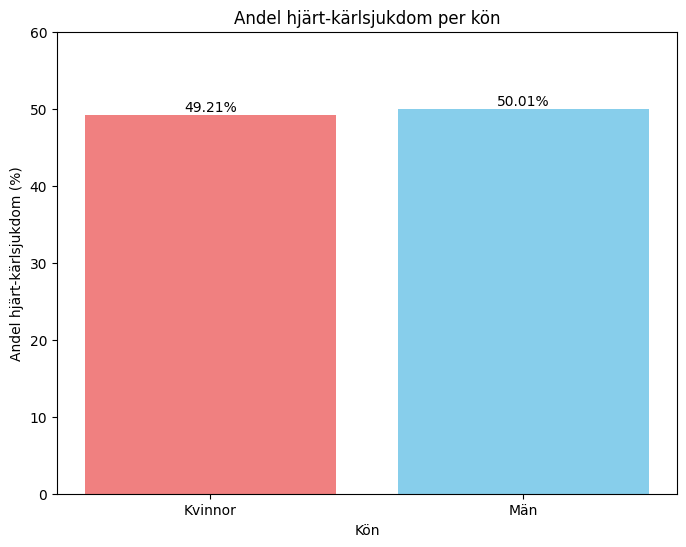

In [107]:
# 7. Hur stor andel av kvinnor respektive män har hjärt och kärlsjukdom? 

# Beräkna antalet kvinnor och män med hjärt-kärlsjukdom
antal_sjuka_kvinnor = df[(df["gender"] == 1) & (df["cardio"] == 1)].shape[0]
antal_sjuka_man = df[(df["gender"] == 2) & (df["cardio"] == 1)].shape[0]


# Beräkna totalt antal kvinnor och män
totalt_kvinnor = df[df["gender"] == 1].shape[0]
totalt_man = df[df["gender"] == 2].shape[0]

# Beräkna andelen hjärt-kärlsjukdom per kön
andel_sjuka_kvinnor = (antal_sjuka_kvinnor / totalt_kvinnor) * 100
andel_sjuka_man = (antal_sjuka_man / totalt_man) * 100


# Visa resultatet
print(f"Antal kvinnor med hjärt-kärlsjukdom: {antal_sjuka_kvinnor}")
print(f"Totalt antal kvinnor: {totalt_kvinnor}")
print(f"Andel hjärt-kärlsjukdom för kvinnor: {andel_sjuka_kvinnor:.2f}%")
print(f"Antal män med hjärt-kärlsjukdom: {antal_sjuka_man}")
print(f"Totalt antal män: {totalt_man}")
print(f"Andel hjärt-kärlsjukdom för män: {andel_sjuka_man:.2f}%")

# Skapa etiketter för kön
kon_etiketter = ["Kvinnor", "Män"]

# Rita stapeldiagram
plt.figure(figsize=(8, 6))
bars = plt.bar(kon_etiketter, [andel_sjuka_kvinnor, andel_sjuka_man], color=["lightcoral", "skyblue"])

# Lägg till procentuella värden ovanpå staplarna
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha="center", va="bottom")

plt.title("Andel hjärt-kärlsjukdom per kön")
plt.xlabel("Kön")
plt.ylabel("Andel hjärt-kärlsjukdom (%)")
plt.ylim(0, 60)  # Justera y-axeln för bättre överblick
plt.show()
